### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20
- electron: tight, pT>10
- muon: tight, pT> 

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 

In [1]:
import ROOT
from IPython.display import display, Math, Latex
import rootnotes

Welcome to JupyROOT 6.10/05


In [2]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


## Import Samples

In [3]:
%run interactiveStackTree.py --baseDir /data/users/jkunkle/Resonances/LepLep_elel_2018_03_28/ \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root

-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
Sample GJets_HT-600ToInf              cross section : 93.380000 pb     N Events : 2463946  sample lumi : 26386.228314      Scale : 1.360558      
Sample WZ3LNLO                        cross section : 5.260000 pb      N Events : 8260201  sample lumi : 1570380.418251    Scale : 0.022861      
Sample WJetsToLNu_HT-800To1200        cross section : 7.484300 pb      N Events : 1544513  sample lumi : 206367.061716     Scale : 0.173962      
Sample WJetsToLNu_HT-600To800         cross section : 16.288000 pb     N Events : 3779141  sample lumi : 232019.953340     Scale : 0.154728      
Sample GJets_HT-100To200              cross section : 9226.000000 pb   N Events : 5131873  sample lumi : 556.240299        Scale : 64.540451     
Sample ResonanceMass2000              cross section : 0.000172 pb      N Events : 50000    sample lumi : 289872165.921251  Scale : 0.000124      
Sample TTJets_SingleLep

In [4]:
baseeta = base = 'ph_n>=0 && el_n==2'

In [5]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,l)',
               'rlabel':'blue/magenta' ,         'doratio' : 1,  'normalize':1}
samples.CompareSelections('m_ll', [baseeta,baseeta],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 0 #gamma', ' Z#gamma : 1 #gamma']})

Creating hist for m_ll
m_ll : ph_n>=0 && el_n==2 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_ll : ph_n>=0 && el_n==2 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_ll
['DYJetsToLL_M-50']
Scale m_ll by 1.000000
Creating hist for m_ll_0
m_ll : ph_n>=0 && el_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_ll : ph_n>=0 && el_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_ll_0
['ZGTo2LG']
Scale m_ll_0 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_ll at 7f7f34315488>, <Sample m_ll_0 at 7f7f34315e18>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


Error in <TGClient::TGClient>: can't open display "", switching to batch mode...
 In case you run from a remote ssh session, reconnect with ssh -Y


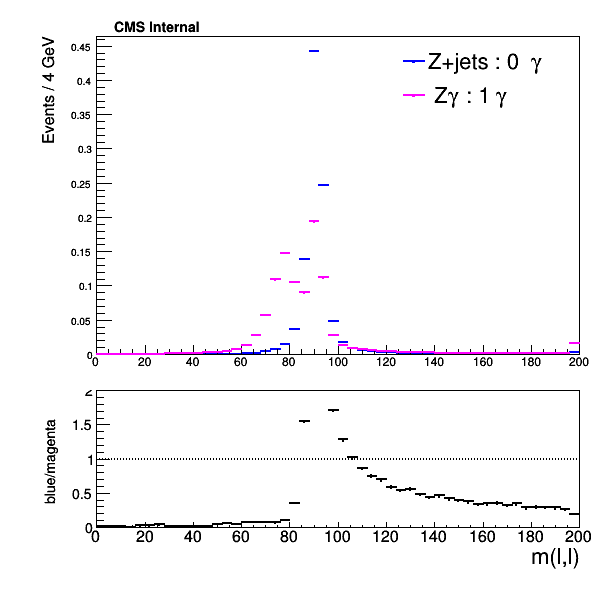

Info in <TCanvas::Print>: png file /tmp/tmpRtG9d4.png has been created


In [6]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified();ROOT.gPad.Update()

samples.curr_canvases['base']


### ee 2-body mass in well-reconstructed Z+jet and Z gamma events

- The ISR peak is larger than FSR peak (sub-Z-mass contribution)
- compare to plot last week. The FSR peak was larger.
- FSR photon is colinear with one of the photons. This increases chance of mis-reconstruction (needs verify: two photon objects are collinear)

In [79]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'count',
               'rlabel':'blue/magenta' ,         'doratio' : 1,'reverseratio':1,'ymax':1e9,'ymin':1e3,'rmax':1e-2}
samples.CompareSelections('0', [baseeta+"&& ph_n==0",baseeta+"&& ph_n==1"],['Z+jets']*2, (1,0,1),
                          hist_config, {}, {'legend_entries':['Zjets: 0 #gamma', ' Zjets : 1 #gamma']})

removing sample 0_5
removing sample 0_6
removing sample ratioZ+jets
Creating hist for 0_7
0 : ph_n>=0 && el_n==2&& ph_n==0 
(1, 0, 1)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
0 : ph_n>=0 && el_n==2&& ph_n==0 
(1, 0, 1)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR 0_7
['DYJetsToLL_M-50']
Scale 0_7 by 1.000000
Creating hist for 0_8
0 : ph_n>=0 && el_n==2&& ph_n==1 
(1, 0, 1)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
0 : ph_n>=0 && el_n==2&& ph_n==1 
(1, 0, 1)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR 0_8
['DYJetsToLL_M-50']
Scale 0_8 by 1.000000
Scale ratioZ+jets by 1.000000
[<Sample 0_7 at 7f7f2acbd710>, <Sample 0_8 at 7f7f2acbd830>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


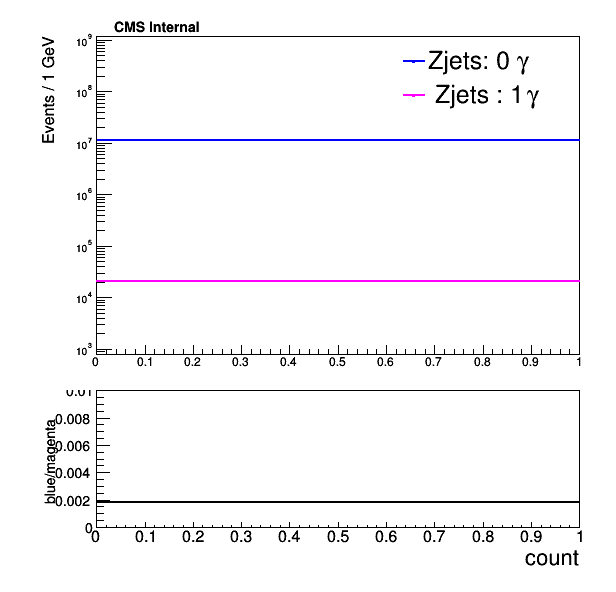

Info in <TCanvas::Print>: png file /tmp/tmphOK4oS.png has been created


In [80]:
samples.curr_canvases['top'].cd()
samples.curr_canvases['top'].SetLogy()
ROOT.gPad.Modified();ROOT.gPad.Update()

samples.curr_canvases['base']
